In [42]:
import pandas as pd
import numpy as np
from catboost import  CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, log_loss
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\Housing.csv")
y = df["price"]
X = df.drop('price',axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=24)

In [38]:
cat = list(X.select_dtypes(include=object).columns)

In [28]:
### logistic Regression

In [29]:
cat =  CatBoostRegressor(random_state=24,cat_features=cat)

cat.fit(X_train,y_train)

y_pred  = cat.predict(X_test)
print("r2_score = ", r2_score(y_test,y_pred))

Learning rate set to 0.035168
0:	learn: 26401.5780724	total: 1.32ms	remaining: 1.32s
1:	learn: 25978.7424047	total: 2.44ms	remaining: 1.22s
2:	learn: 25562.4776567	total: 3.53ms	remaining: 1.17s
3:	learn: 25174.5545802	total: 4.62ms	remaining: 1.15s
4:	learn: 24813.2769041	total: 5.74ms	remaining: 1.14s
5:	learn: 24409.3346585	total: 6.9ms	remaining: 1.14s
6:	learn: 24090.4271427	total: 8.12ms	remaining: 1.15s
7:	learn: 23769.0521312	total: 9.34ms	remaining: 1.16s
8:	learn: 23464.5364251	total: 10.5ms	remaining: 1.15s
9:	learn: 23124.8319264	total: 11.7ms	remaining: 1.16s
10:	learn: 22818.0762020	total: 12.9ms	remaining: 1.16s
11:	learn: 22531.3535513	total: 14ms	remaining: 1.15s
12:	learn: 22215.1129317	total: 15.1ms	remaining: 1.15s
13:	learn: 21915.4604994	total: 16.2ms	remaining: 1.14s
14:	learn: 21628.2409282	total: 17.3ms	remaining: 1.14s
15:	learn: 21380.1514422	total: 18.6ms	remaining: 1.14s
16:	learn: 21114.2843282	total: 19.7ms	remaining: 1.14s
17:	learn: 20887.1565683	total:

In [30]:
cat.get_params()

{'loss_function': 'RMSE',
 'random_state': 24,
 'cat_features': ['driveway',
  'recroom',
  'fullbase',
  'gashw',
  'airco',
  'prefarea']}

In [31]:
### Gridsearch for best estimator

In [39]:
cat =  CatBoostRegressor(random_state=24,cat_features=cat)
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
params = {"learning_rate":np.linspace(0.001,0.9,10),"max_depth":[None,2,3,4],"n_estimators":[25,50,100]}
gcv = GridSearchCV(cat,param_grid=params,cv=kfold,scoring='r2',n_jobs=-1)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

0:	learn: 22957.2788738	total: 766us	remaining: 18.4ms
1:	learn: 20571.7014201	total: 1.81ms	remaining: 20.8ms
2:	learn: 18991.0936338	total: 2.47ms	remaining: 18.1ms
3:	learn: 17935.5884377	total: 3.11ms	remaining: 16.3ms
4:	learn: 17223.2643907	total: 3.73ms	remaining: 14.9ms
5:	learn: 16706.5835631	total: 4.36ms	remaining: 13.8ms
6:	learn: 16250.3615955	total: 5.01ms	remaining: 12.9ms
7:	learn: 15879.4662517	total: 5.62ms	remaining: 12ms
8:	learn: 15430.5186150	total: 6.26ms	remaining: 11.1ms
9:	learn: 15207.4315182	total: 6.89ms	remaining: 10.3ms
10:	learn: 15062.4558875	total: 7.5ms	remaining: 9.55ms
11:	learn: 14839.3348923	total: 8.12ms	remaining: 8.79ms
12:	learn: 14821.2280668	total: 8.45ms	remaining: 7.8ms
13:	learn: 14653.6076359	total: 9.08ms	remaining: 7.14ms
14:	learn: 14512.0546123	total: 9.72ms	remaining: 6.48ms
15:	learn: 14413.2605760	total: 10.3ms	remaining: 5.82ms
16:	learn: 14352.8208852	total: 11ms	remaining: 5.16ms
17:	learn: 14259.5774198	total: 11.6ms	remaining

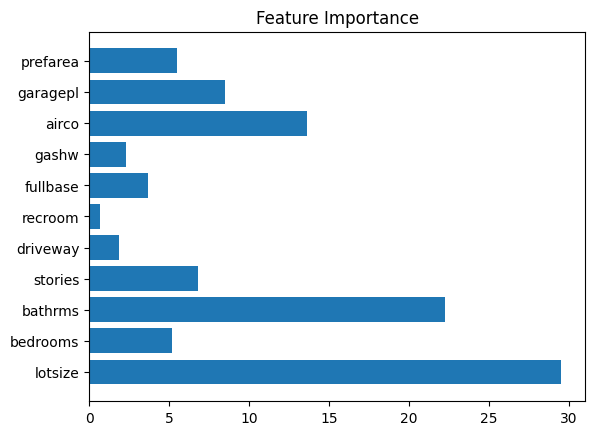

In [43]:
best_tree = gcv.best_estimator_
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":best_tree.feature_importances_})
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()